In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit

###################################################################
# Plot options
###################################################################
font = {'family' : 'serif',
        'serif'   : 'palatino',
        # 'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (7.5, 3)

###################################################################
# Colors
###################################################################
# Palette 1
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

[ -1.63058263 598.5957839 ]
Melting temperature (K) and error (K)
367.10545856972425 6.132777216979264
The difference in entropy is -0.006522330517608853 kJ/(mol K) per atom
Melting temperature (K) and error (K)
903.1223913091773 12.915900873739588
The difference in entropy is -0.012097491419873442 kJ/(mol K) per atom


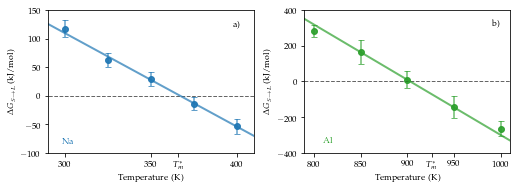

In [91]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=3.0)

# Na
N=250.
temp=[300,325,350,375,400]
deltaG=[117.62652535248172 ,62.49906695166346 ,28.598933535107207 ,-14.143518030007957 ,-53.0988022692785 ]
devs=[15.543716378981262,12.898783132321741,12.22767486483943,11.256322732019825,13.250860878553173]

axs[0].errorbar(temp,deltaG,yerr=devs,color=palette[0],alpha=0.7, fmt='o',capsize=3)
axs[0].scatter(temp,deltaG,color=palette[0],s=30,marker='o',alpha=0.7)
axs[0].plot([275,425],[0,0],'--',color="black",linewidth=1.0,alpha=0.6)

# Fit
def func(x, a, b):
    return a*x + b
x = np.array([350,375,400])
y = np.array([28.598933535107207 ,-14.143518030007957 ,-53.0988022692785])
yerror=np.array([12.898783132321741,12.22767486483943,11.256322732019825])

xPoints = np.linspace(250,450,3)

popt, pcov = curve_fit(func, x, y, sigma=yerror, absolute_sigma=False)
#error=np.sqrt(np.diag(pcov))
print(popt)
#print(error)
#print("Melting temperature (K) and error (K)")
#print(-popt[1]/popt[0],error[1]*np.abs(1/popt[0])+error[0]*np.abs(popt[1]/np.power(popt[0],2)))
#print(-popt[1]/popt[0],-popt[1]/popt[0]*np.sqrt( np.power(error[0]/popt[0],2)  + np.power(error[1]/popt[1],2) ))
#print(-popt[1]/popt[0],  np.sqrt( np.power(error[1]/popt[0],2)  + np.power(error[0]*popt[1]/np.power(popt[0],2),2)))

axs[0].plot(xPoints,f(xPoints,*popt),color=palette[0],linewidth=2.0,alpha=0.7)
#axs[0].plot(xPoints,f(xPoints,popt[0],popt[1]+10),color=palette[2],linewidth=1.0,alpha=0.7)
print("Melting temperature (K) and error (K)")
print(-popt[1]/popt[0],(popt[1]/popt[0])-(popt[1]+10)/popt[0])

print("The difference in entropy is " + str(popt[0]/N) + " kJ/(mol K) per atom")

#plt.yticks(np.linspace(-80,120,6),np.linspace(-80,120,6).astype(int))
axs[0].set_xlim([290,410])
axs[0].set_ylim([-100,150])
axs[0].set_xlabel("Temperature (K)")
axs[0].set_ylabel(r'$\Delta$$G_{S \rightarrow L}$ (kJ/mol)')
#plt.tick_params(axis='x', pad=10)
#plt.tick_params(axis='y', pad=10)
axs[0].set_xticks([300,350,366,400])
axs[0].set_xticklabels([300,350,r'$T_m^*$',400])
axs[0].text(398,120,"a)")
axs[0].text(298,-85,"Na",color=palette[0])
           
# Aluminum    
N=256.
temp=np.array([800,850,900,950,1000])
deltaG=np.array([284.9668366618594,165.4368443494553,8.795860015471163,-144.464288356120,-263.3049731825267])
devs=np.array([33.58854670399301,69.09513132867271,47.646871734705684,60.88836767382691,44.49864404887787])

axs[1].errorbar(temp,deltaG,yerr=devs,color=palette[4],alpha=0.7, fmt='o',capsize=3)
axs[1].scatter(temp,deltaG,color=palette[4],s=30,marker='o',alpha=0.7)
axs[1].plot([750,1050],[0,0],'--',color="black",linewidth=1.0,alpha=0.6)

# Fit
def func(x, a, b):
    return a*x + b

x = np.array([850,900,950])
y = np.array([165.4368443494553,8.795860015471163,-144.464288356120])
yerror = np.array([69.09513132867271,47.646871734705684,60.88836767382691])
xPoints = np.linspace(700,1100,3)
#plt.plot(xPoints,m*xPoints+c,color=palette[4],linewidth=4.0,alpha=0.7)

popt, pcov = curve_fit(func, x, y, sigma=yerror, absolute_sigma=False)
#error=np.sqrt(np.diag(pcov))
#print(popt)
#print(error)
#print("Melting temperature (K) and error (K)")
#print(-popt[1]/popt[0],np.sqrt( np.power(error[1]/popt[0],2)  + np.power(error[0]*popt[1]/np.power(popt[0],2),2)))
#print(-popt[1]/popt[0],-popt[1]/popt[0]*np.sqrt( np.power(error[0]/popt[0],2)  + np.power(error[1]/popt[1],2) ))
axs[1].plot(xPoints,f(xPoints,*popt),color=palette[4],linewidth=2.0,alpha=0.7)
#axs[1].plot(xPoints,f(xPoints,popt[0],popt[1]+40),color=palette[2],linewidth=1.0,alpha=0.7)
print("Melting temperature (K) and error (K)")
print(-popt[1]/popt[0],(popt[1]/popt[0])-(popt[1]+40)/popt[0])

print("The difference in entropy is " + str(popt[0]/N) + " kJ/(mol K) per atom")

###################################################################
# Plot options
###################################################################

axs[1].set_xlim([790,1010])
axs[1].set_ylim([-400,400])
axs[1].set_xlabel("Temperature (K)")
axs[1].set_ylabel(r'$\Delta$$G_{S \rightarrow L}$ (kJ/mol)')
axs[1].set_xticks([800,850,900,926,950,1000])
axs[1].set_xticklabels([800,850,900,r"$T_m^*$",950,1000])
axs[1].text(990,310,"b)")
axs[1].text(810,-340,"Al",color=palette[4])

#plt.tick_params(axis='x', pad=10)
#plt.tick_params(axis='y', pad=10)

plt.savefig('plot.png', bbox_inches='tight', dpi=300)

plt.show()
